In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

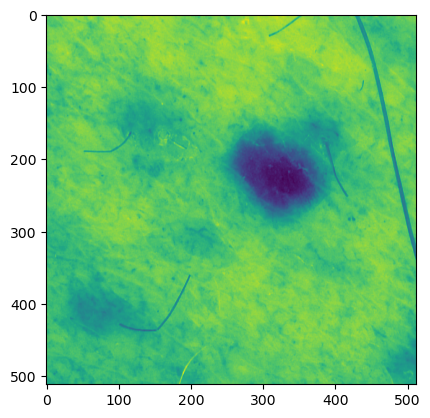

In [4]:
imshow(images[100])

In [5]:
masks.shape

(12311, 512, 512, 1)

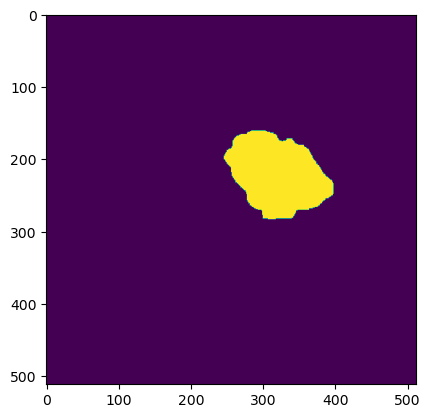

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpbha708hrkuc_unet2d


In [11]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpbha708hrkuc_unet2d
Verbose mode active!


In [12]:
R.classifier = C ### use custom classifier

In [13]:
R.run(images, masks, runs=18, batch_size=16)

Weights OK!
******
Loop 1
Epoch 1/100
39/39 [==============================] - 37s 685ms/step - loss: 0.6012 - dice_coeff: 0.2976 - val_loss: 0.5735 - val_dice_coeff: 0.3417
Epoch 2/100
39/39 [==============================] - 19s 486ms/step - loss: 0.5290 - dice_coeff: 0.3180 - val_loss: 0.5062 - val_dice_coeff: 0.3408
Epoch 3/100
39/39 [==============================] - 19s 488ms/step - loss: 0.4709 - dice_coeff: 0.3750 - val_loss: 0.4578 - val_dice_coeff: 0.4155
Epoch 4/100
39/39 [==============================] - 19s 486ms/step - loss: 0.4613 - dice_coeff: 0.4018 - val_loss: 0.4597 - val_dice_coeff: 0.4078
Epoch 5/100
39/39 [==============================] - 19s 503ms/step - loss: 0.4458 - dice_coeff: 0.4234 - val_loss: 0.4193 - val_dice_coeff: 0.5221
Epoch 6/100
39/39 [==============================] - 19s 490ms/step - loss: 0.4170 - dice_coeff: 0.5137 - val_loss: 0.4828 - val_dice_coeff: 0.4667
Epoch 7/100
39/39 [==============================] - 19s 491ms/step - loss: 0.4211 - d

Epoch 3/100
78/78 [==============================] - 30s 382ms/step - loss: 0.3875 - dice_coeff: 0.5490 - val_loss: 0.3996 - val_dice_coeff: 0.5621
Epoch 4/100
78/78 [==============================] - 30s 384ms/step - loss: 0.3874 - dice_coeff: 0.5587 - val_loss: 0.3920 - val_dice_coeff: 0.5591
Epoch 5/100
78/78 [==============================] - 30s 381ms/step - loss: 0.9601 - dice_coeff: 0.4655 - val_loss: 4.4445 - val_dice_coeff: 8.6961e-16
Epoch 6/100
78/78 [==============================] - 30s 380ms/step - loss: 4.1963 - dice_coeff: 1.0279e-15 - val_loss: 4.4445 - val_dice_coeff: 8.6961e-16
Model saved to: /tmp/tmpbha708hrkuc_unet2d/kuc_unet2d_5kuc_unet2d_model
History saved to: /tmp/tmpbha708hrkuc_unet2d/kuc_unet2d_history_5.pkl
Testing the classifier...
Testing the discriminator...
24/24 [==============================] - 1s 37ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 378 machine labels.
Replacing 126 from 378 !
D_relabeled_ 126
point ids 126
Removed: 126 Filled: 126


Testing the classifier...
Testing the discriminator...
24/24 [==============================] - 1s 35ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 362 machine labels.
Replacing 120 from 362 !
D_relabeled_ 120
point ids 120
Removed: 120 Filled: 120
TOOK 296.71781158447266 seconds
==== DONE LOOP 13 ====
******
Loop 14
Epoch 1/100
140/140 [==============================] - 47s 334ms/step - loss: 4.3705 - dice_coeff: 8.9644e-16 - val_loss: 4.4445 - val_dice_coeff: 8.6961e-16
Epoch 2/100
140/140 [==============================] - 46s 331ms/step - loss: 4.3705 - dice_coeff: 9.6713e-16 - val_loss: 4.4445 - val_dice_coeff: 8.6961e-16
Epoch 3/100
140/140 [==============================] - 46s 327ms/step - loss: 4.3705 - dice_coeff: 9.0549e-16 - val_loss: 4.4445 - val_dice_coeff: 8.6961e-16
Model saved to: /tmp/tmpbha708hrkuc_unet2d/kuc_unet2d_13kuc_unet2d_model
History saved to: /tmp/tmpbha708hrkuc_unet2d/kuc_unet2d_history_13.pkl
Testing the classifier...
Testing the discriminator...
24/

In [14]:
R.classifier_scores # after 18 runs of GP2

[[0.4387241005897522, 0.5510194301605225],
 [0.4284452795982361, 0.5182367563247681],
 [0.42190396785736084, 0.5547459721565247],
 [0.42222684621810913, 0.5457472801208496],
 [0.42135217785835266, 0.5687949657440186],
 [4.572991371154785, 4.1659335571188555e-16],
 [4.555581092834473, 4.160812713557111e-16],
 [4.530019760131836, 4.23123662097861e-16],
 [4.478644847869873, 4.2667055962492917e-16],
 [4.446985721588135, 4.2735051532333756e-16],
 [4.436941146850586, 4.2934255152682246e-16],
 [4.435905933380127, 4.364234557982928e-16],
 [4.424293518066406, 4.2917984179161083e-16],
 [4.39798641204834, 4.3576888461852243e-16],
 [4.390179634094238, 4.3382433519964297e-16],
 [4.383213996887207, 4.373794912979469e-16],
 [4.366474151611328, 4.363629723519029e-16],
 [4.374508857727051, 4.3340468331383767e-16]]

In [15]:
R.discriminator_scores # after 18 runs of GP2

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

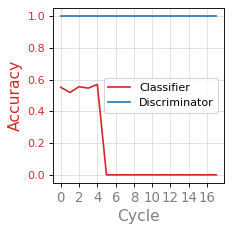

In [16]:
R.plot() # after 18 runs of GP2

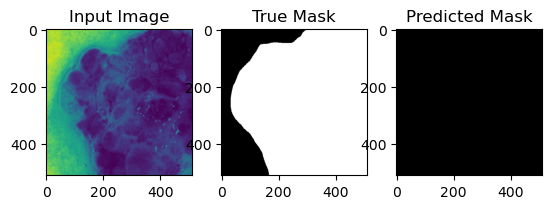

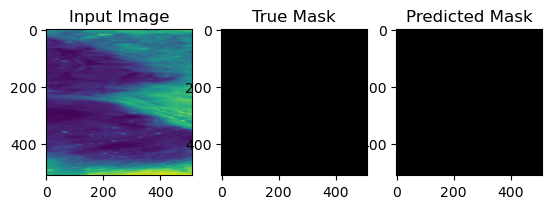

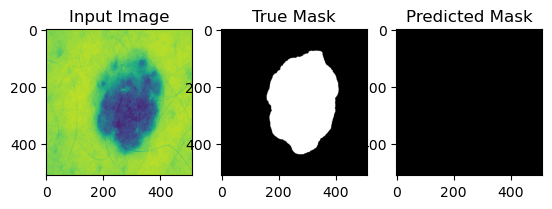

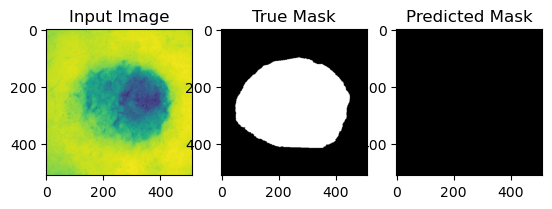

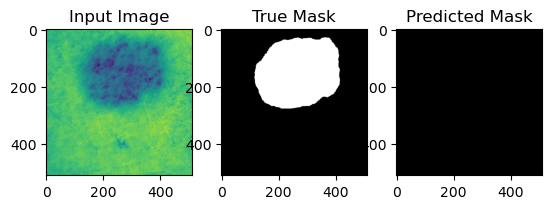

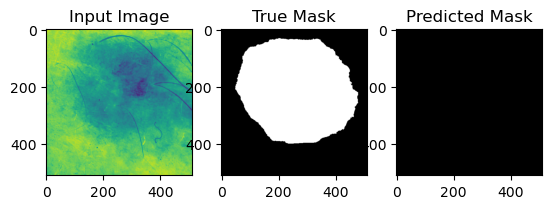

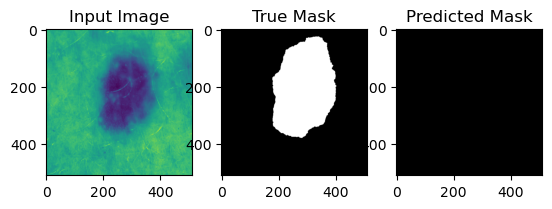

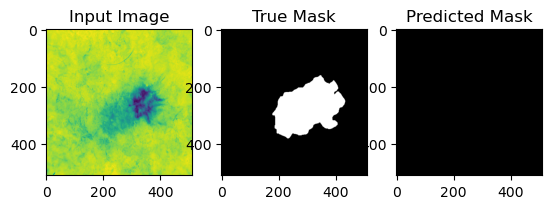

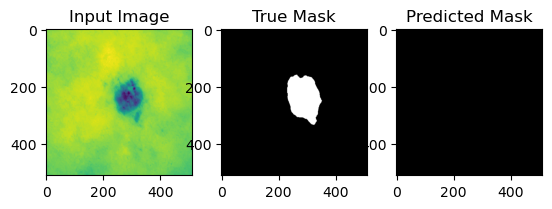

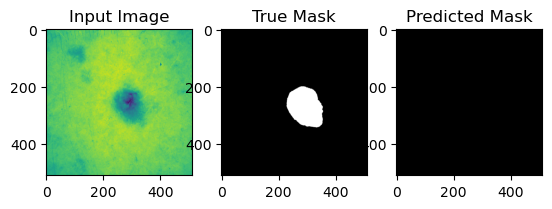

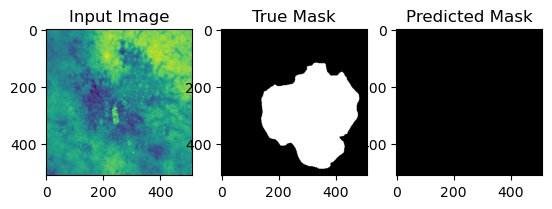

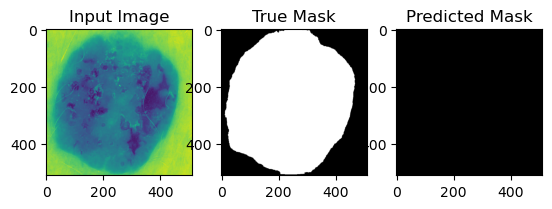

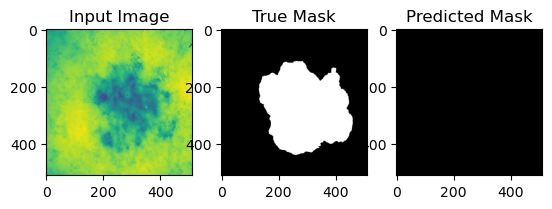

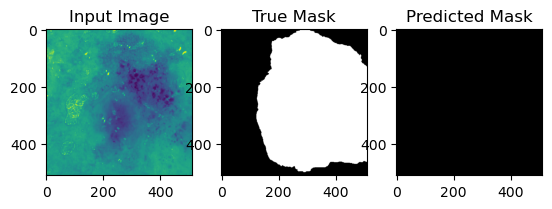

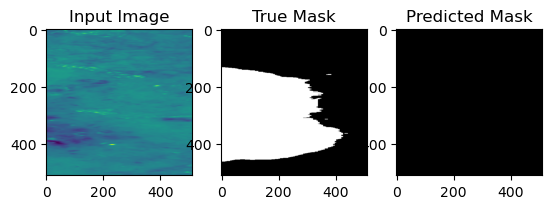

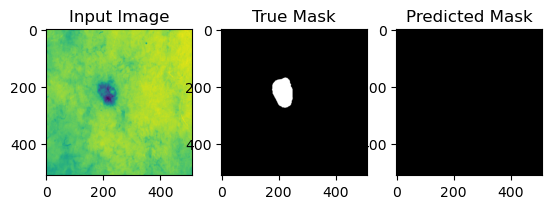

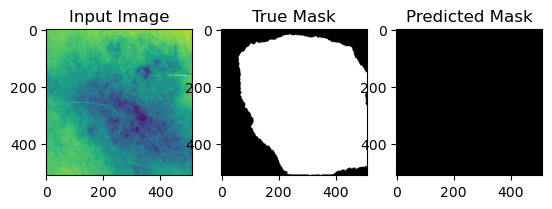

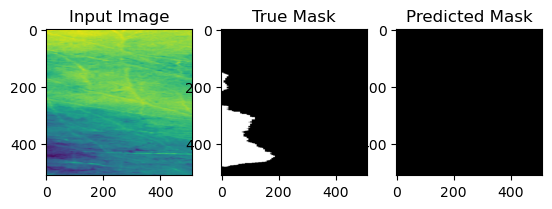

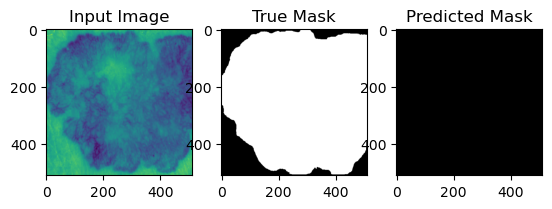

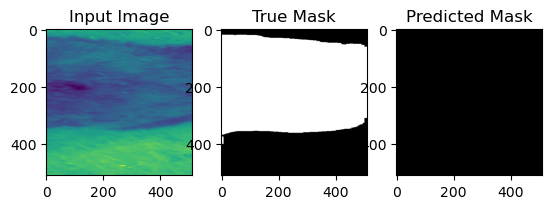

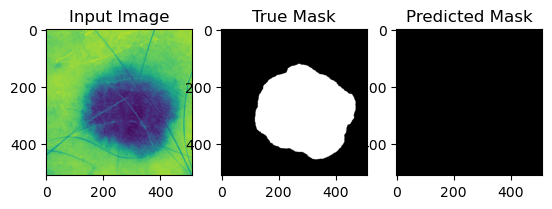

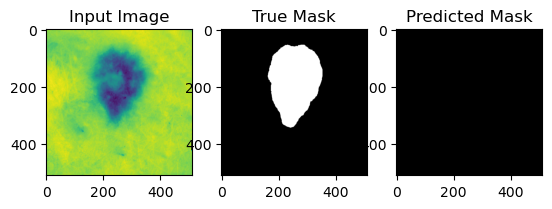

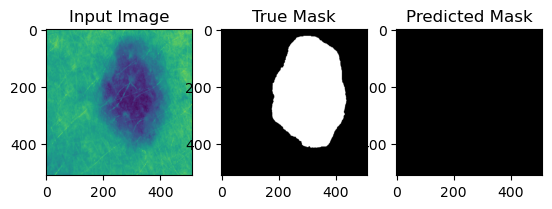

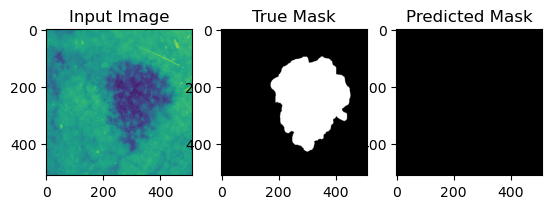

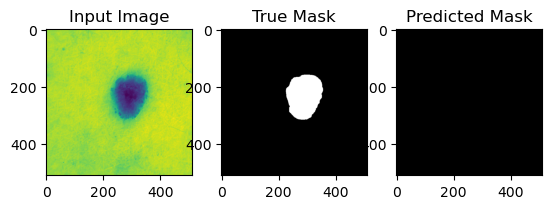

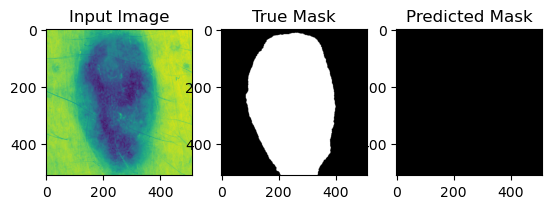

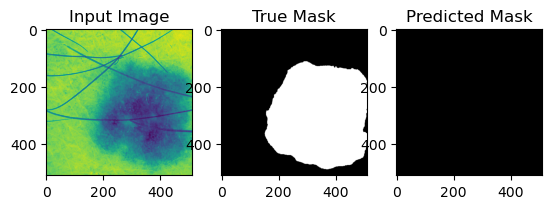

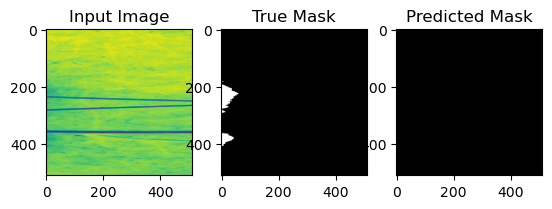

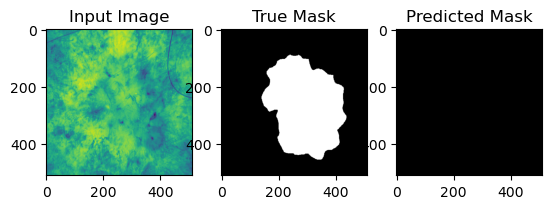

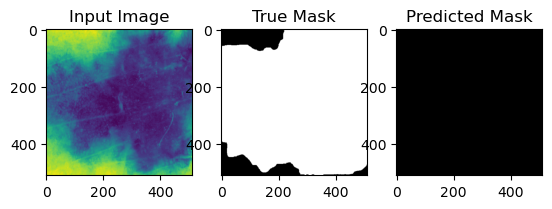

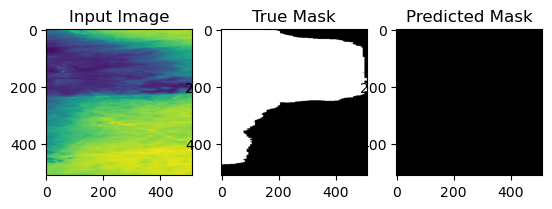

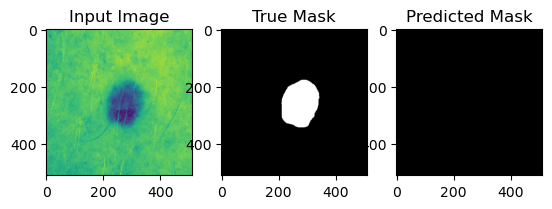

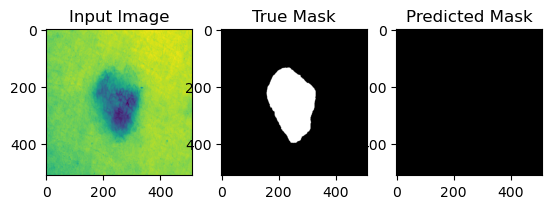

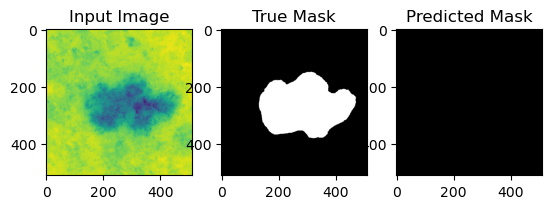

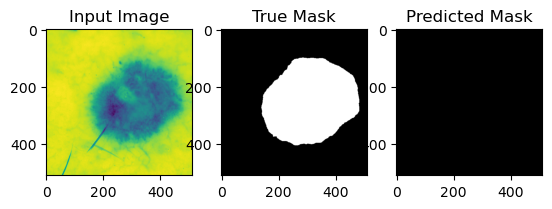

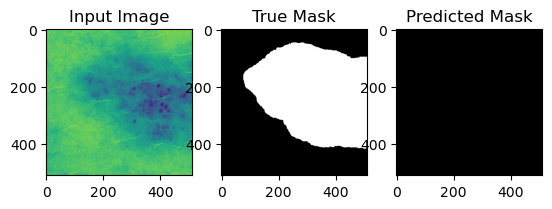

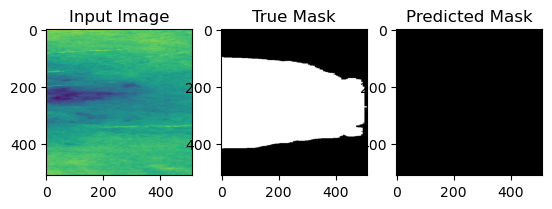

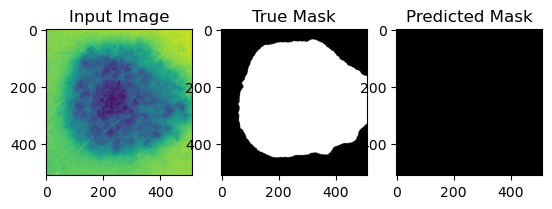

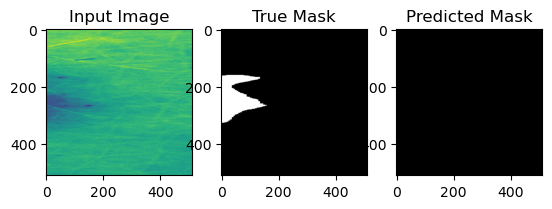

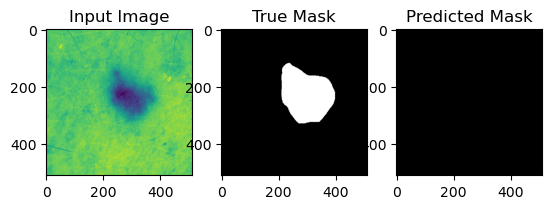

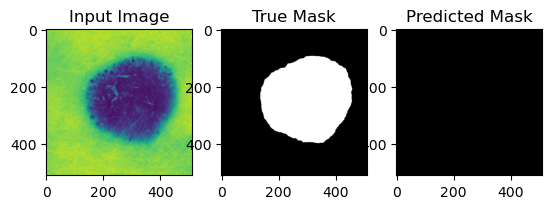

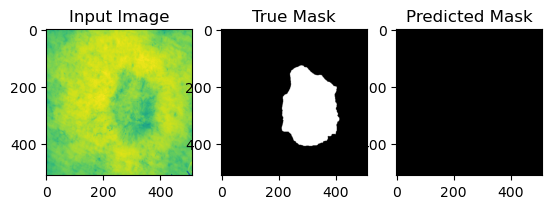

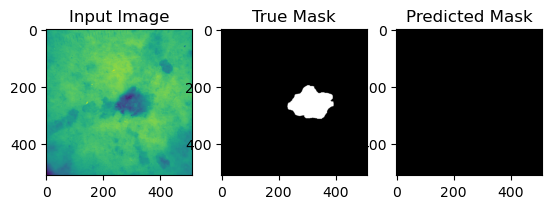

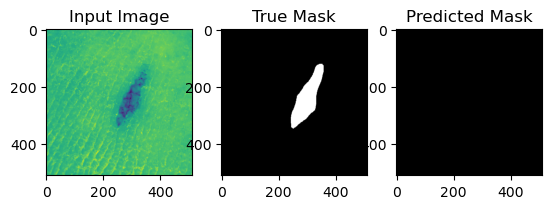

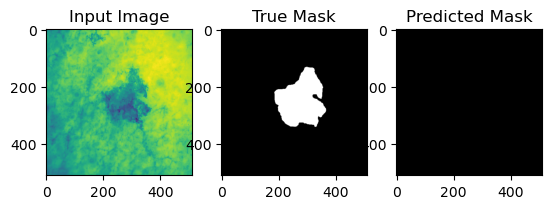

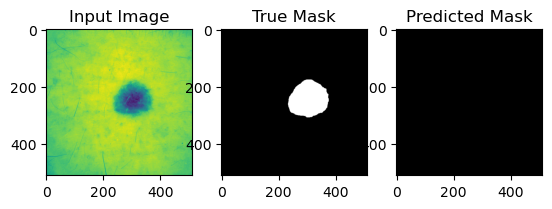

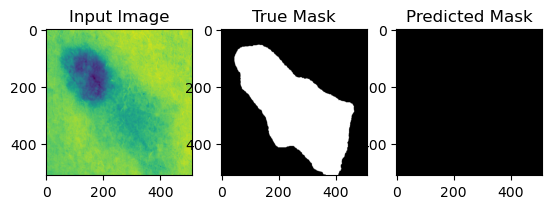

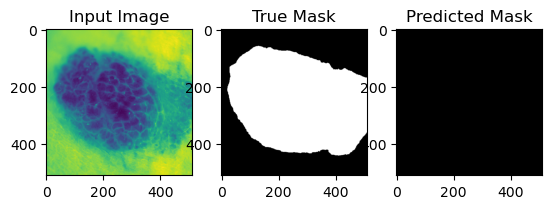

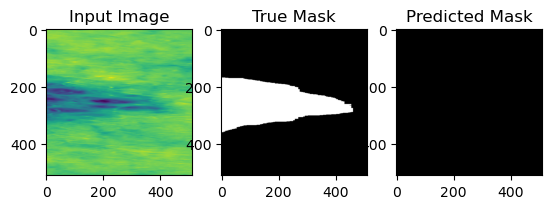

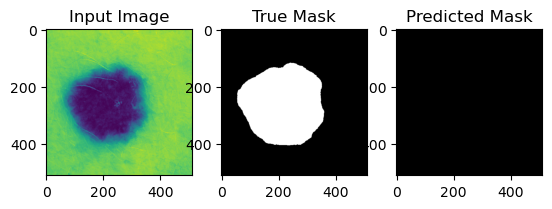

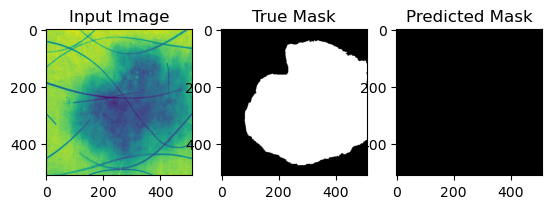

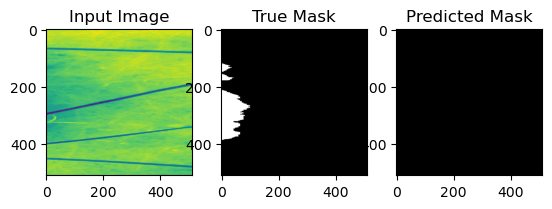

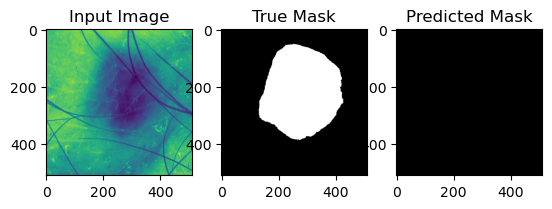

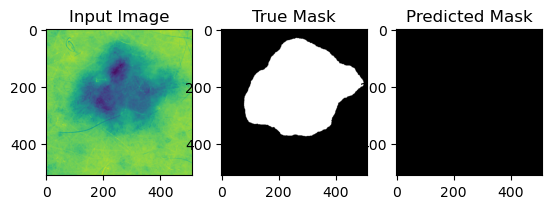

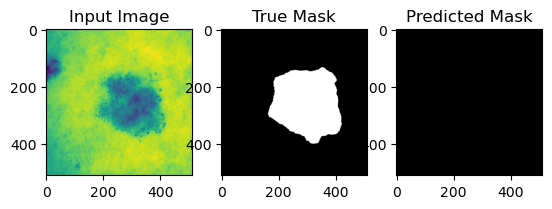

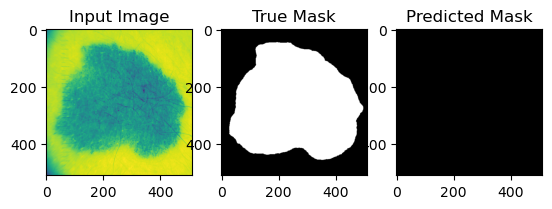

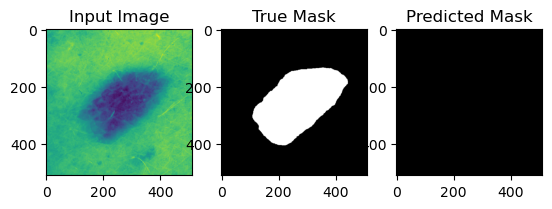

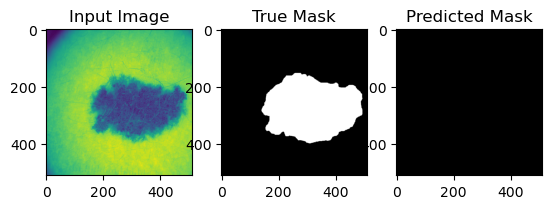

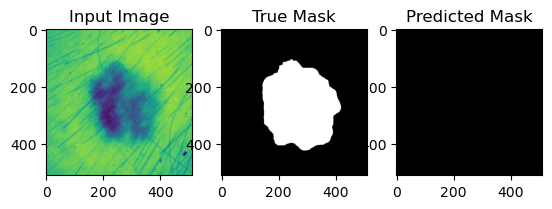

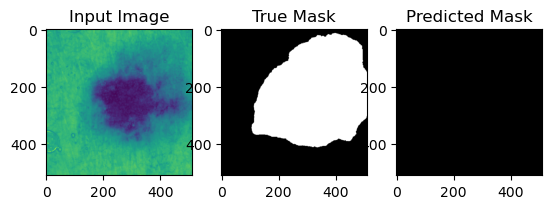

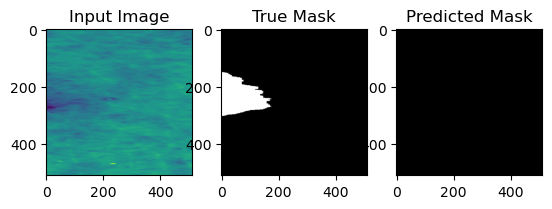

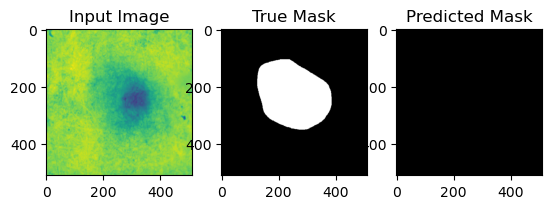

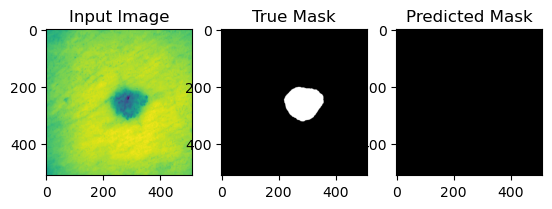

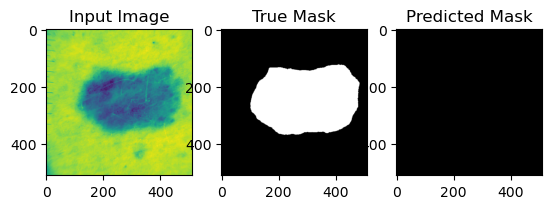

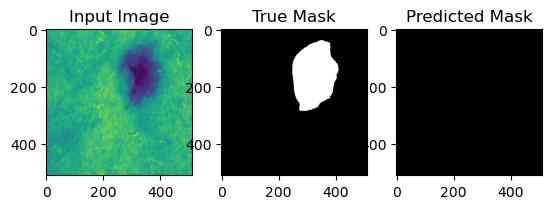

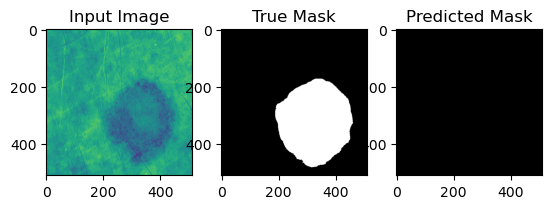

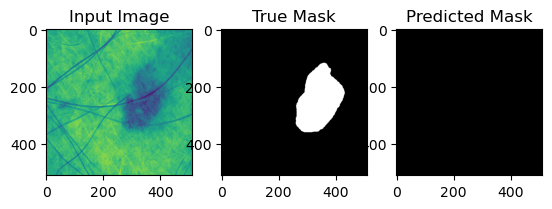

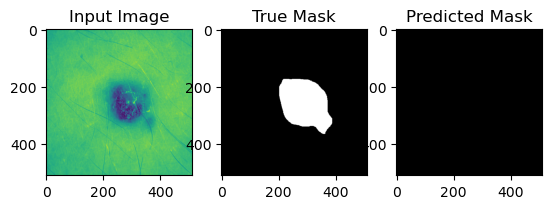

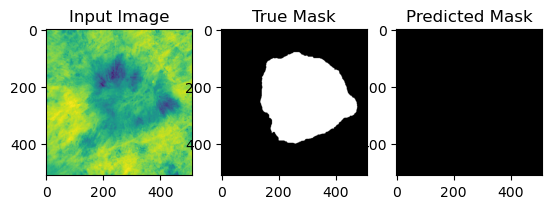

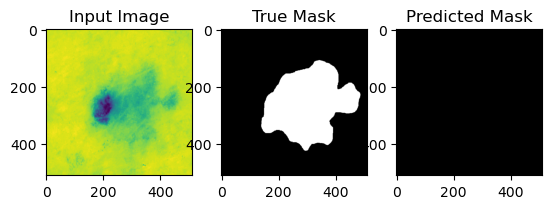

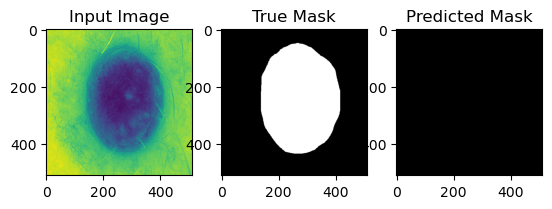

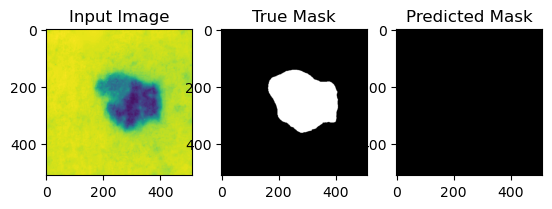

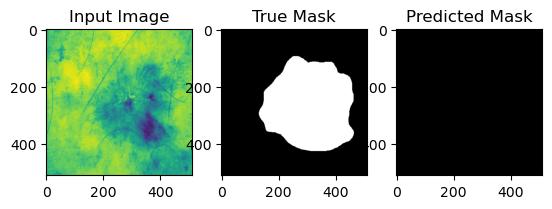

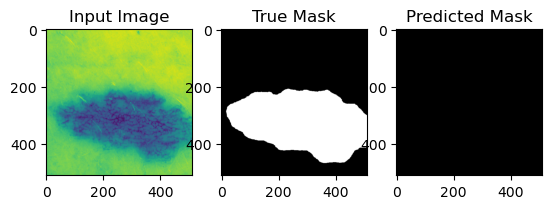

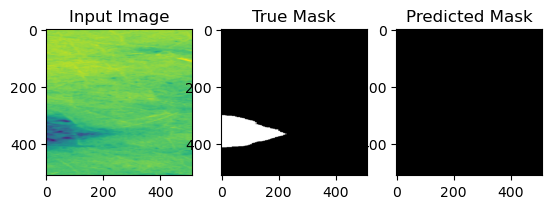

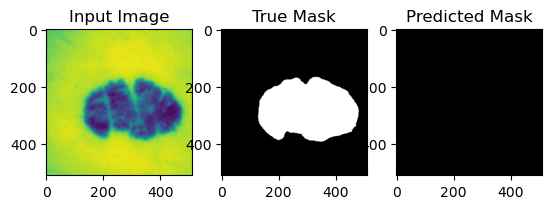

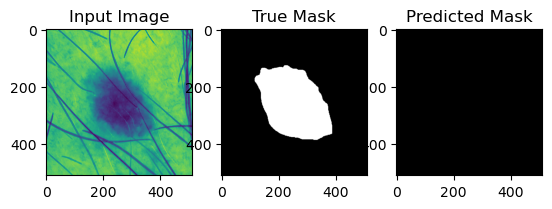

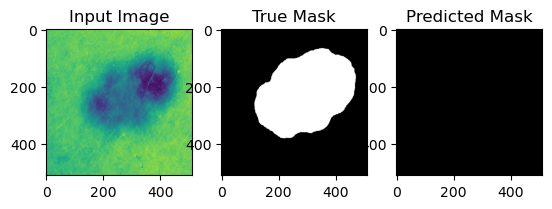

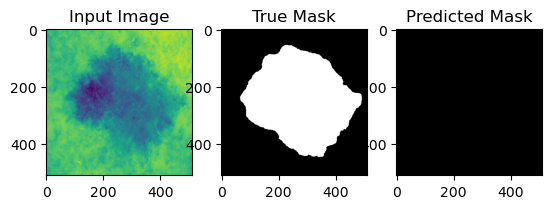

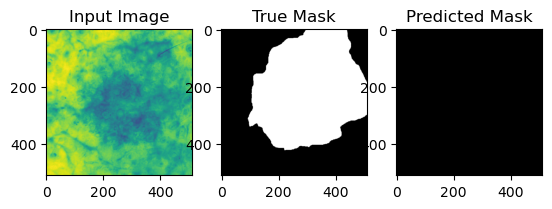

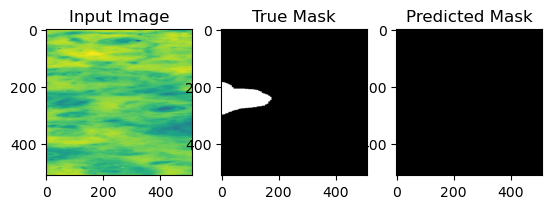

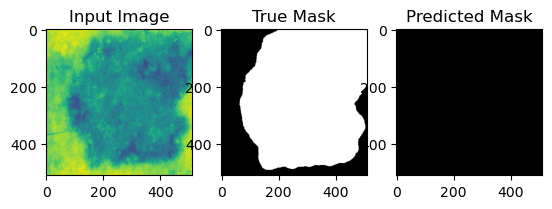

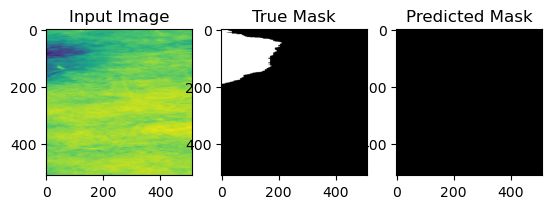

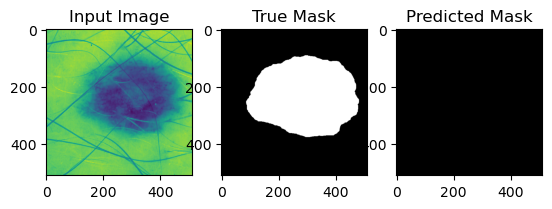

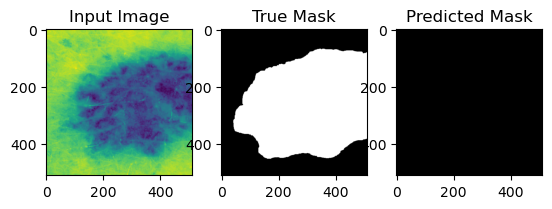

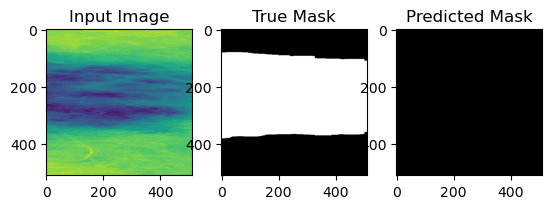

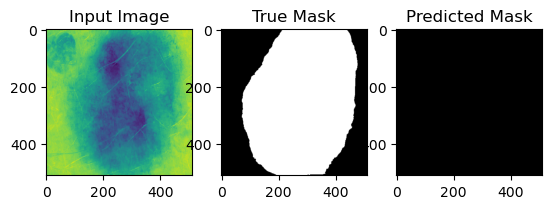

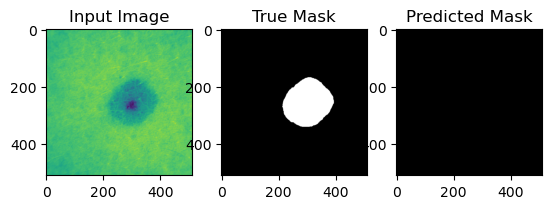

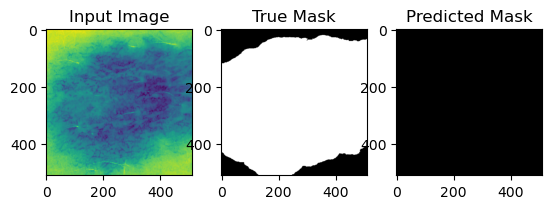

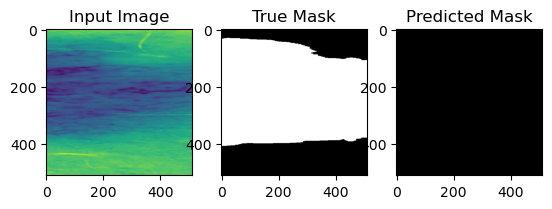

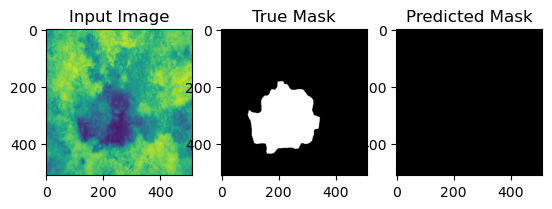

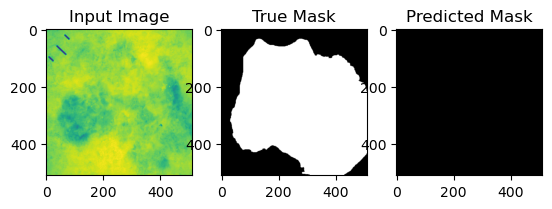

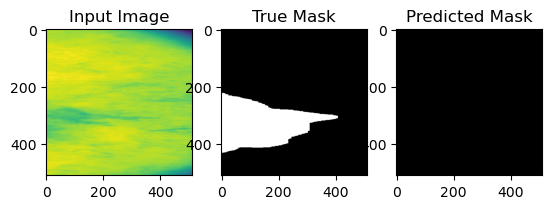

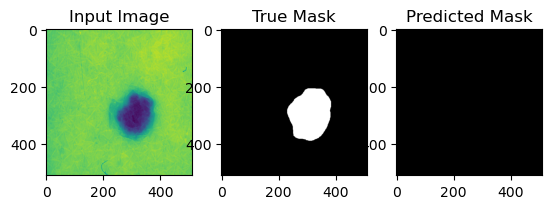

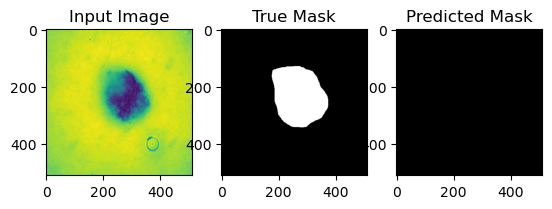

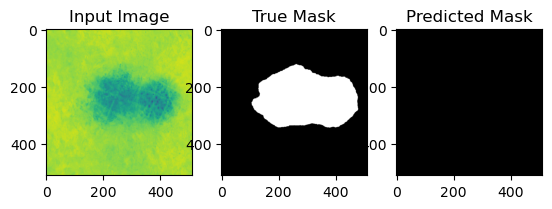

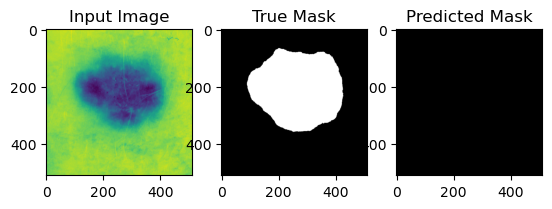

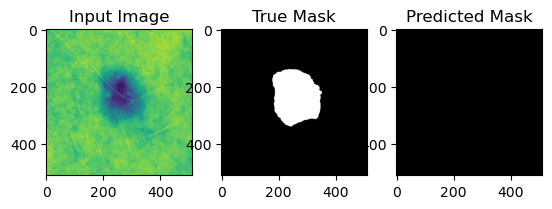

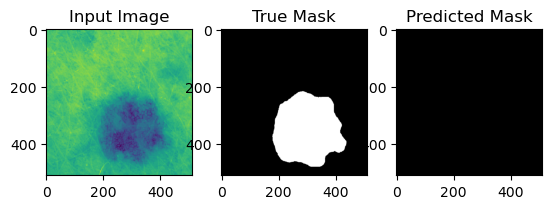

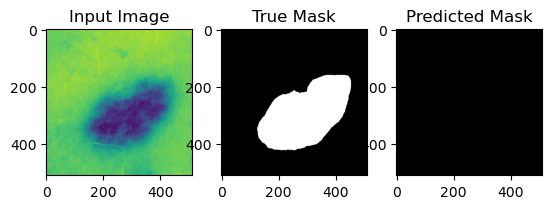

In [17]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) # after 18 runs of GP2